In [1]:
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Economies: GTM (Guatemala), UMC (Upper Middle Income), WLD (World)
country_codes = ['CHL', 'UMC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [2]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract Guatemala for specific calculations
df_gtm = df.xs('CHL', axis=1, level=0).copy()

Fetching data...


In [3]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_gtm['Natural_Rate_Unemp'] = df_gtm['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_gtm['Productivity'] = df_gtm['GDP_Const'] / df_gtm['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_gtm['NCO'] = df_gtm['Exports_GDP'] - df_gtm['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_gtm['Budget_Balance'] = df_gtm['Tax_Rev_GDP'] - df_gtm['Gov_Exp_GDP']

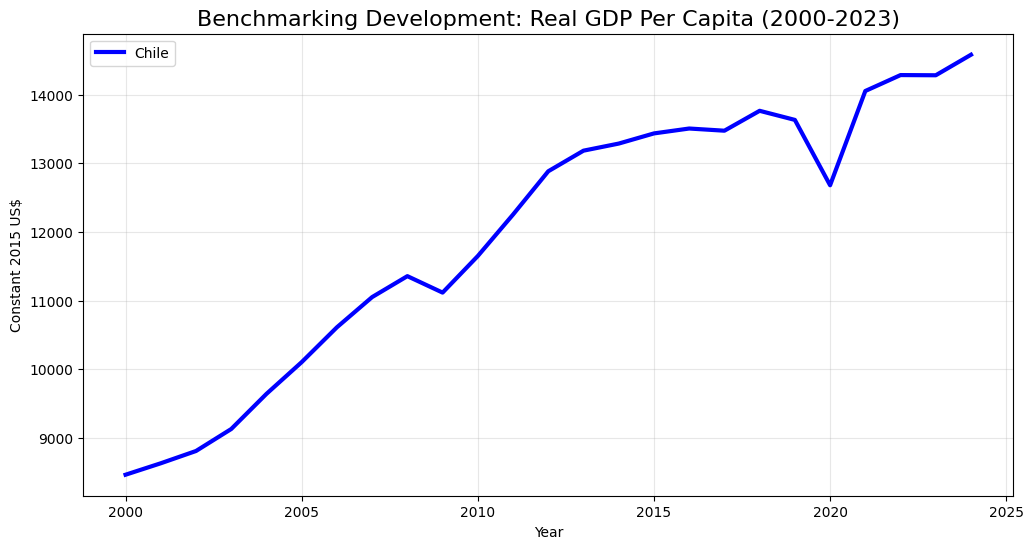

In [4]:
plt.figure(figsize=(12, 6))
# Plot ONLY Guatemala
plt.plot(df.index, df[('CHL', 'GDP_Per_Capita_Const')], label='Chile', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

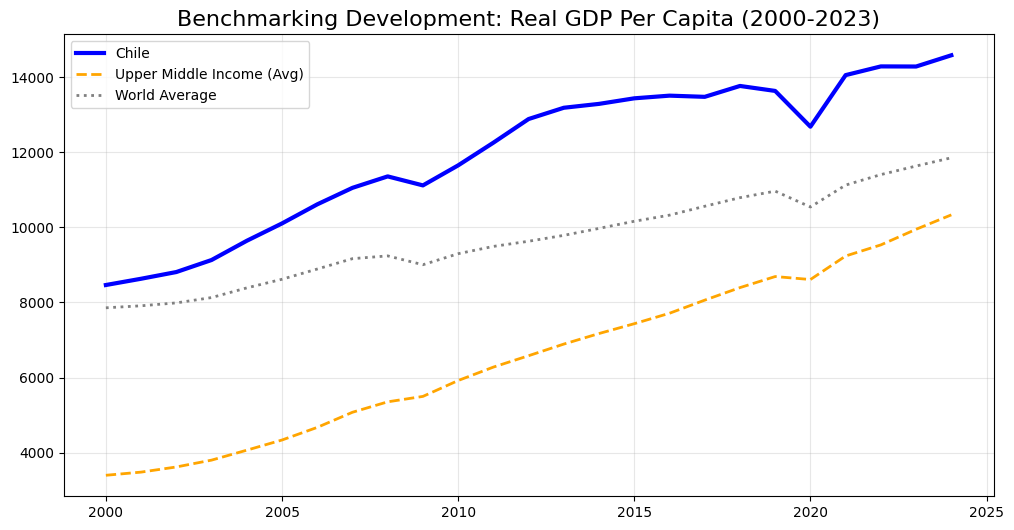

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('CHL', 'GDP_Per_Capita_Const')], label='Chile', color='blue', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

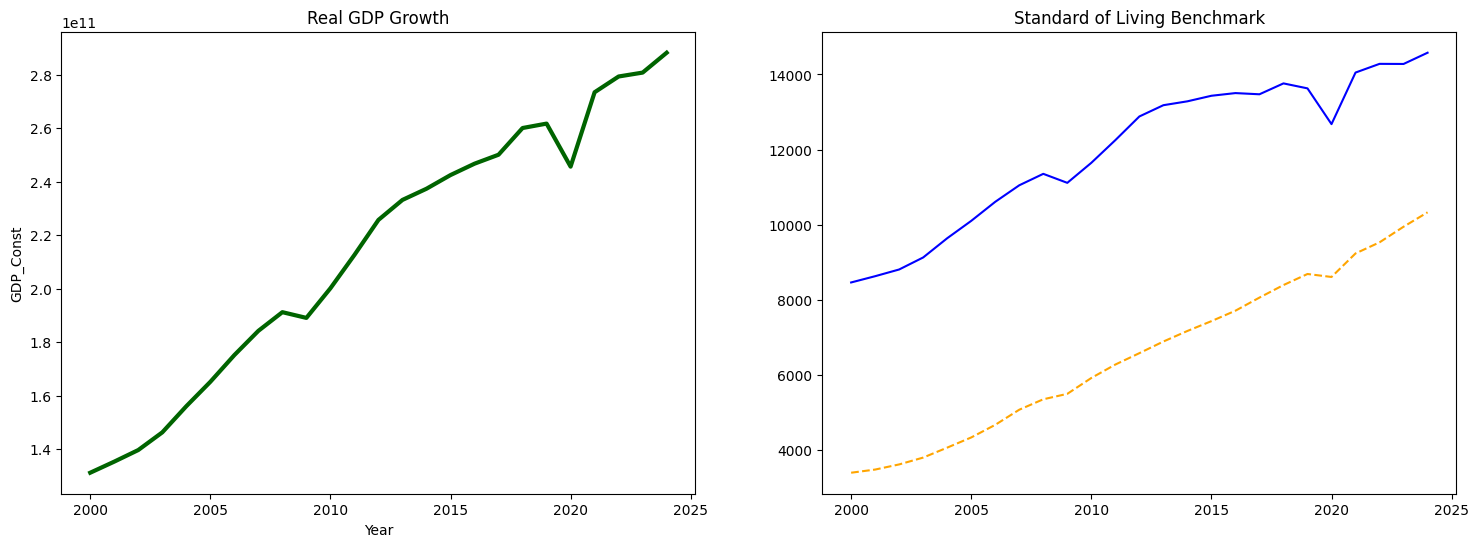

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_gtm, x=df_gtm.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('CHL', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

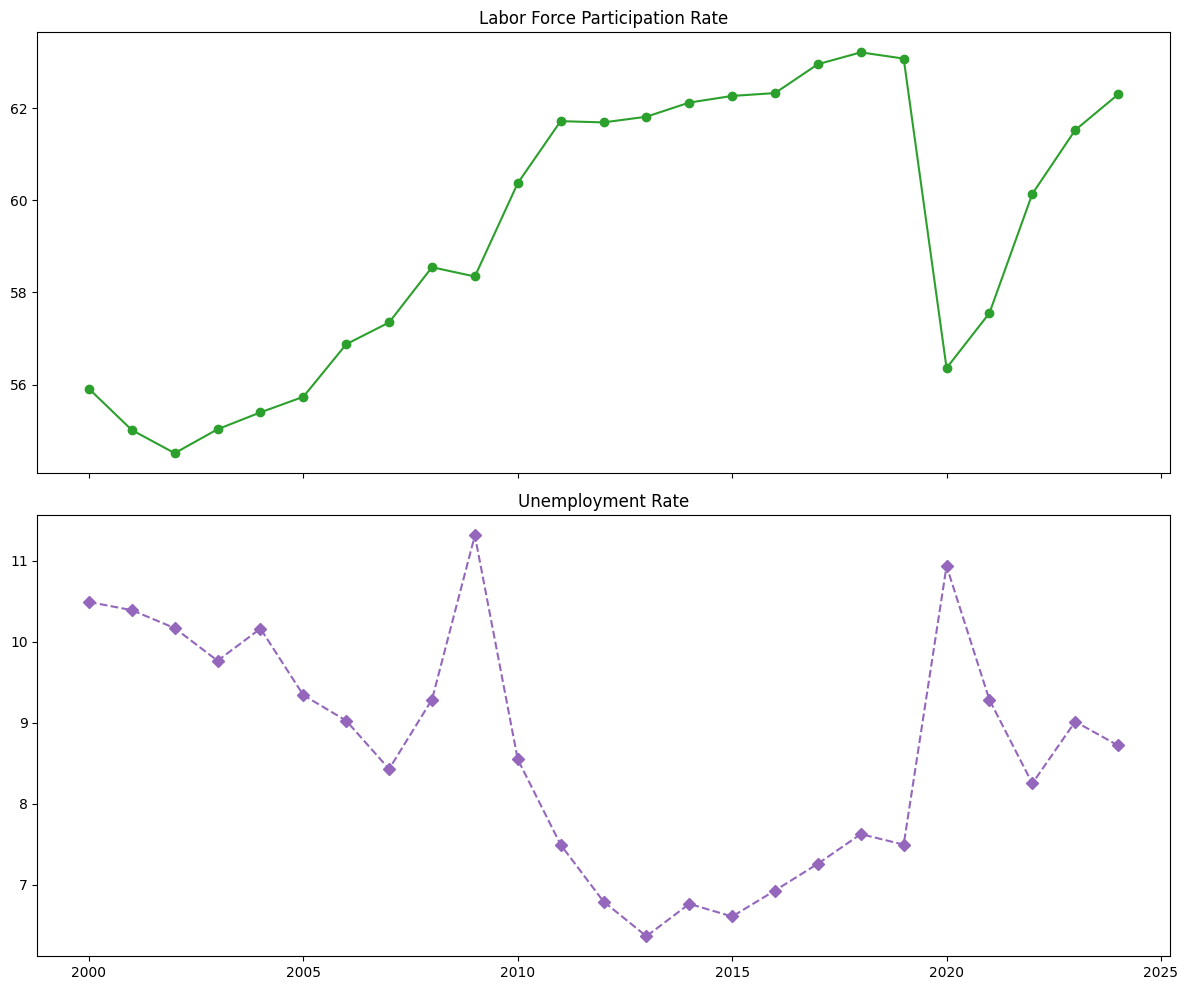

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_gtm.index, df_gtm['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_gtm.index, df_gtm['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

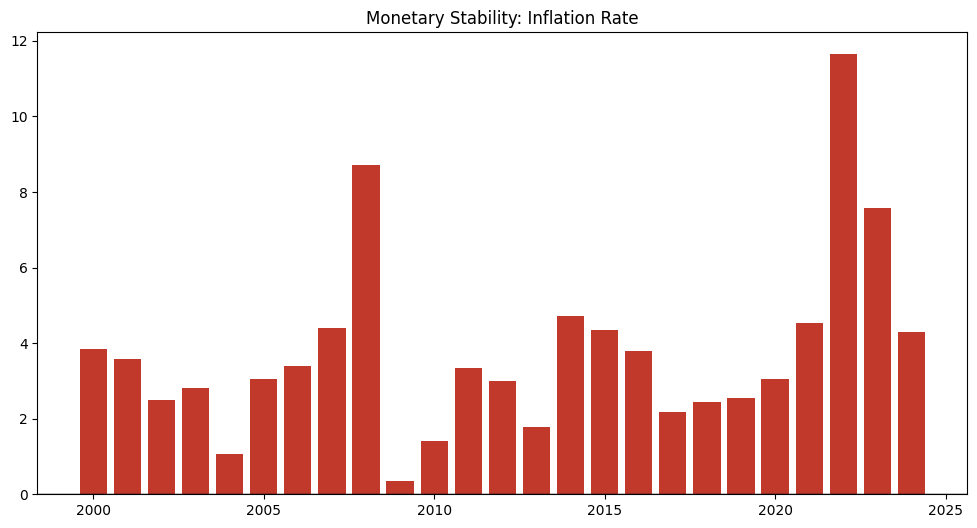

In [8]:
plt.figure(figsize=(12, 6))

plt.bar(df_gtm.index, df_gtm['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

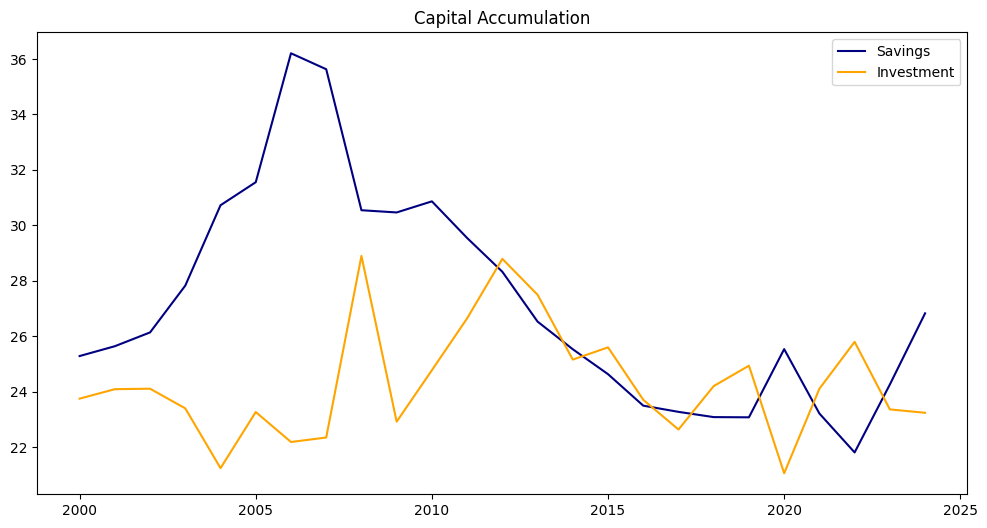

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df_gtm.index, df_gtm['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_gtm.index, df_gtm['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

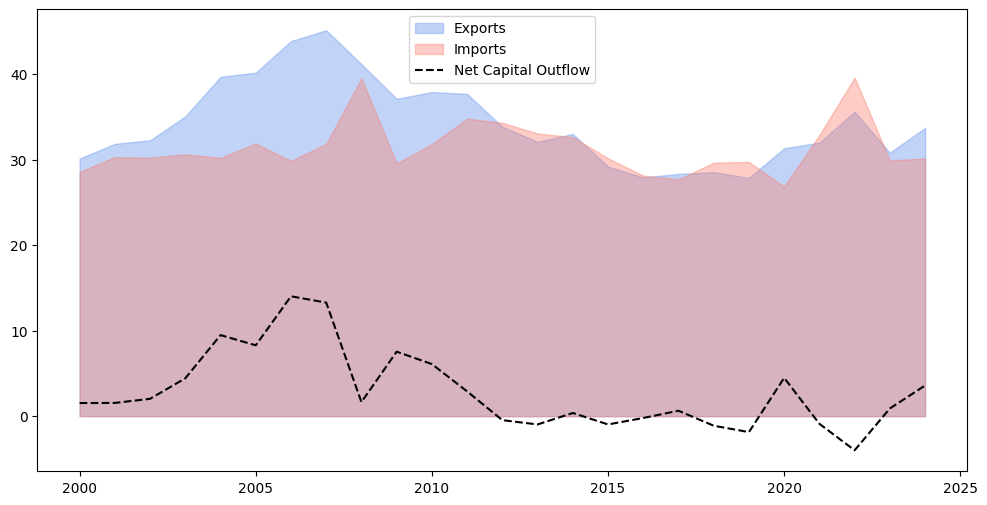

In [10]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_gtm.index, df_gtm['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_gtm.index, df_gtm['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_gtm.index, df_gtm['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

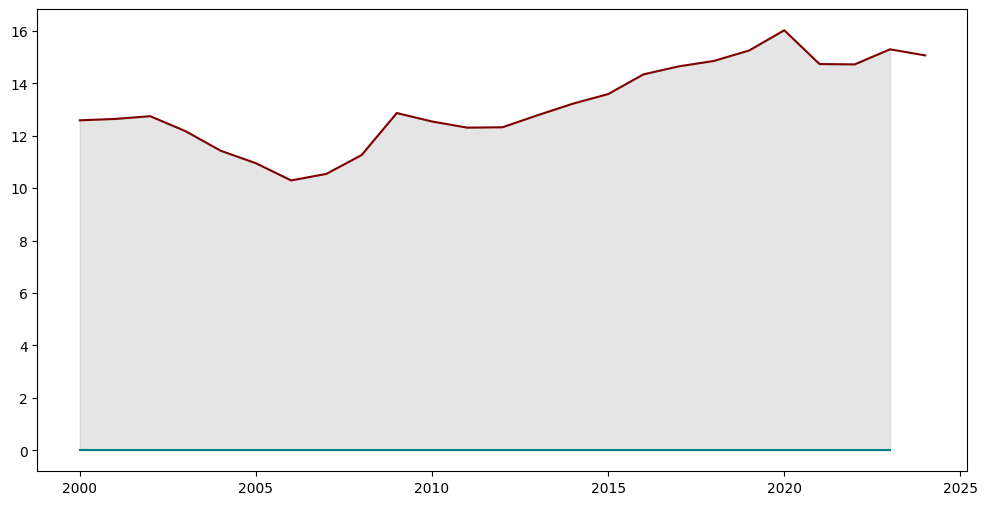

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df_gtm.index, df_gtm['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_gtm.index, df_gtm['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_gtm.index, df_gtm['Tax_Rev_GDP'], df_gtm['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

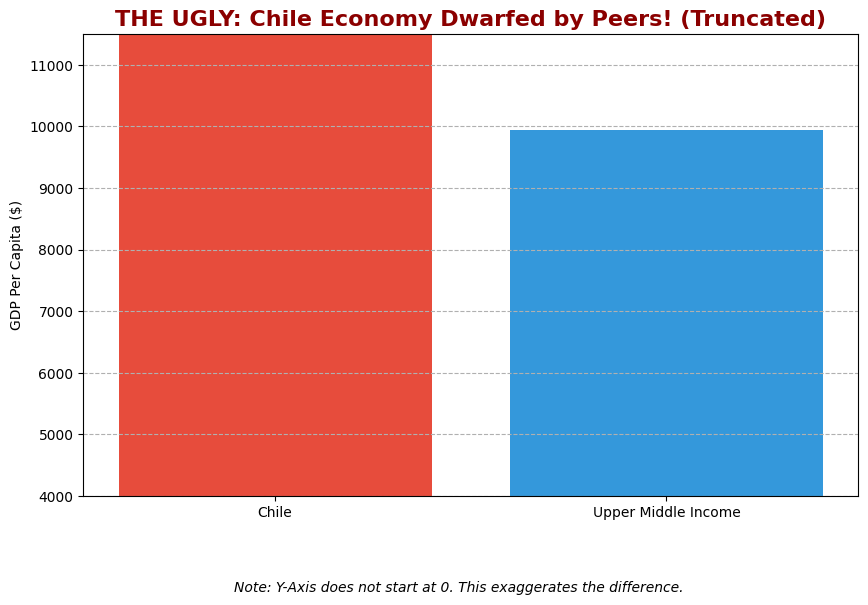

In [13]:
# THE UGLY CHART
# Setup snapshot data for the latest available year
snapshot_year = 2023
gtm_val = df.loc[snapshot_year, ('CHL', 'GDP_Per_Capita_Const')]
umc_val = df.loc[snapshot_year, ('UMC', 'GDP_Per_Capita_Const')]

values = [gtm_val, umc_val]
labels = ['Chile', 'Upper Middle Income']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['#e74c3c', '#3498db'])

# THE VIOLATION: Truncating the axis
# Guatemala is approx 4600. UMC is approx 11000.
# Starting axis at 4000 makes GTM look tiny.
plt.ylim(4000, 11500)

plt.title('THE UGLY: Chile Economy Dwarfed by Peers! (Truncated)', fontsize=16, fontweight='bold', color='darkred')
plt.ylabel('GDP Per Capita ($)')
plt.grid(axis='y', linestyle='--')
plt.figtext(0.5, -0.05, "Note: Y-Axis does not start at 0. This exaggerates the difference.", ha="center", style='italic')

plt.show()

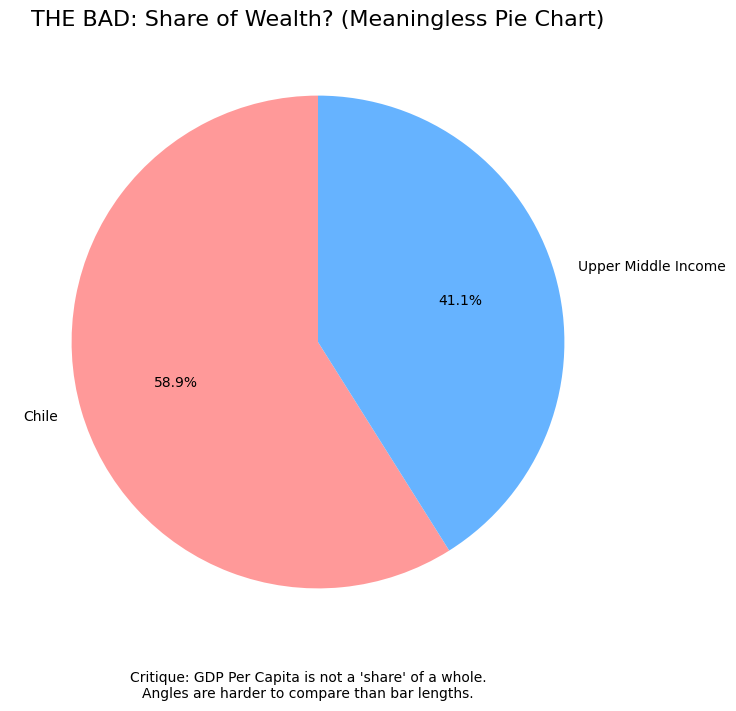

In [14]:
# CELL 9: THE BAD CHART
plt.figure(figsize=(8, 8))

# THE VIOLATION: Using a Pie Chart for non-summable data (GDP Per Capita)
# Comparison of magnitudes should be a Bar Chart, not angles.
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)

plt.title('THE BAD: Share of Wealth? (Meaningless Pie Chart)', fontsize=16)
plt.figtext(0.5, 0.05, "Critique: GDP Per Capita is not a 'share' of a whole.\nAngles are harder to compare than bar lengths.", ha="center")

plt.show()

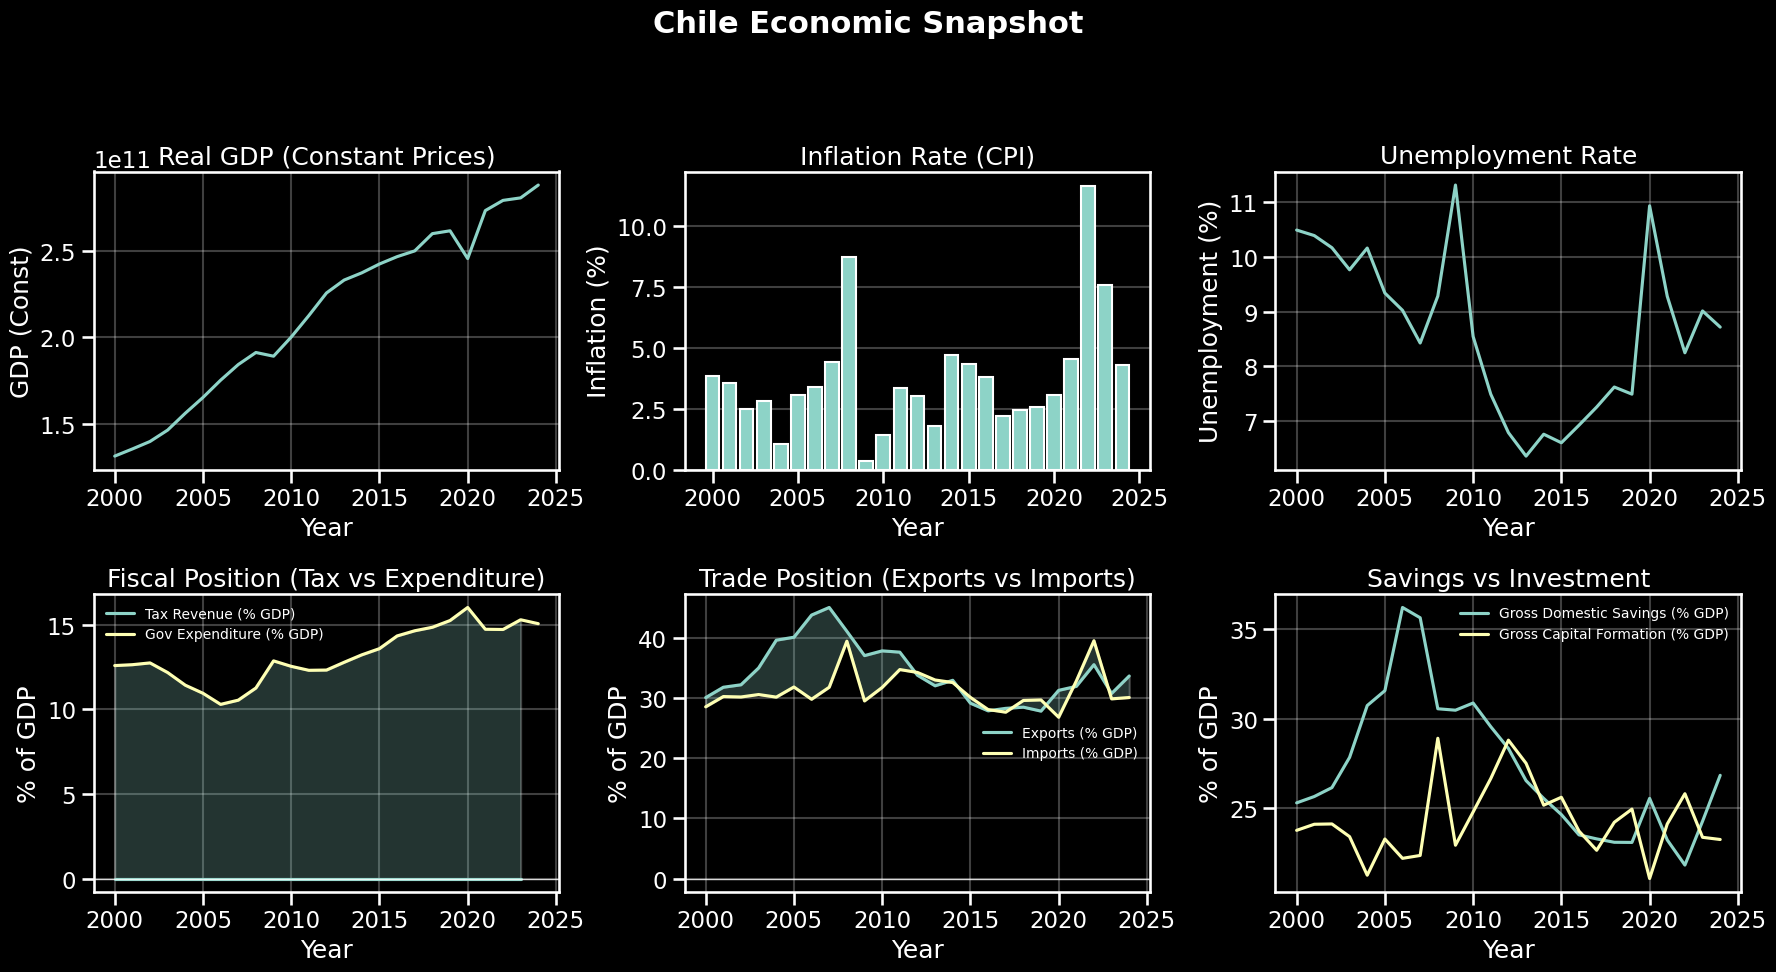

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Optional: make seaborn play nicely with dark background ---
sns.set_theme(context="talk", style="ticks")

plt.style.use("dark_background")

# Pick x-axis: use "Year" column if it exists, otherwise use the DataFrame index
x = df_gtm["Year"] if "Year" in df_gtm.columns else df_gtm.index

fig, axes = plt.subplots(2, 3, figsize=(18, 10), constrained_layout=False)
fig.suptitle("Chile Economic Snapshot", fontsize=22, fontweight="bold", y=0.98)

# -----------------------
# (1) Top Left: Real GDP
# -----------------------
ax = axes[0, 0]
ax.plot(x, df_gtm["GDP_Const"])
ax.set_title("Real GDP (Constant Prices)")
ax.set_xlabel("Year")
ax.set_ylabel("GDP (Const)")
ax.grid(True, alpha=0.25)

# ----------------------------
# (2) Top Middle: Inflation
# ----------------------------
ax = axes[0, 1]
ax.bar(x, df_gtm["Inflation_CPI"])
ax.axhline(0, linewidth=1)
ax.set_title("Inflation Rate (CPI)")
ax.set_xlabel("Year")
ax.set_ylabel("Inflation (%)")
ax.grid(True, axis="y", alpha=0.25)

# --------------------------------
# (3) Top Right: Unemployment Rate
# --------------------------------
ax = axes[0, 2]
ax.plot(x, df_gtm["Unemployment_Rate"])
ax.set_title("Unemployment Rate")
ax.set_xlabel("Year")
ax.set_ylabel("Unemployment (%)")
ax.grid(True, alpha=0.25)

# ---------------------------------------------
# (4) Bottom Left: Fiscal Balance (Tax vs Spend)
# Fill area between Tax_Rev_GDP and Gov_Exp_GDP
# ---------------------------------------------
ax = axes[1, 0]
tax = df_gtm["Tax_Rev_GDP"]
exp = df_gtm["Gov_Exp_GDP"]

ax.plot(x, tax, label="Tax Revenue (% GDP)")
ax.plot(x, exp, label="Gov Expenditure (% GDP)")
ax.fill_between(x, tax, exp, alpha=0.25)

# Optional: show sign of balance
fiscal_balance = tax - exp
ax.axhline(0, linewidth=1, alpha=0.8)

ax.set_title("Fiscal Position (Tax vs Expenditure)")
ax.set_xlabel("Year")
ax.set_ylabel("% of GDP")
ax.legend(frameon=False, fontsize=10)
ax.grid(True, alpha=0.25)

# ------------------------------------------------
# (5) Bottom Middle: Trade Balance (Exports vs Imports)
# Fill area between Exports_GDP and Imports_GDP
# ------------------------------------------------
ax = axes[1, 1]
exports = df_gtm["Exports_GDP"]
imports = df_gtm["Imports_GDP"]

ax.plot(x, exports, label="Exports (% GDP)")
ax.plot(x, imports, label="Imports (% GDP)")
ax.fill_between(x, exports, imports, alpha=0.25)

# Optional: show sign of balance
trade_balance = exports - imports
ax.axhline(0, linewidth=1, alpha=0.8)

ax.set_title("Trade Position (Exports vs Imports)")
ax.set_xlabel("Year")
ax.set_ylabel("% of GDP")
ax.legend(frameon=False, fontsize=10)
ax.grid(True, alpha=0.25)

# -----------------------------------------
# (6) Bottom Right: Savings vs Investment
# -----------------------------------------
ax = axes[1, 2]
ax.plot(x, df_gtm["Gross_Dom_Savings"], label="Gross Domestic Savings (% GDP)")
ax.plot(x, df_gtm["Gross_Cap_Formation"], label="Gross Capital Formation (% GDP)")
ax.set_title("Savings vs Investment")
ax.set_xlabel("Year")
ax.set_ylabel("% of GDP")
ax.legend(frameon=False, fontsize=10)
ax.grid(True, alpha=0.25)

# Make sure subplot titles/labels don’t collide with the main title
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
